# The X-files problem


* [Introduction to the problem](#1)
* [Profiling of data completeness and quality](#2)
* [Descriptive analysis and summary statistics](#3)
* [Hypotheses and Modeling](#4)
* [Conclusion and next steps](#5)

# Introduction to the problem <a id="1"></a>

You’re at the airport, on your way to a Data Science conference abroad. A strange, but somewhat familiar man sits right next to you. He’s talking on the phone and wearing a tin hat. He briefly looks at you and turns away lowering his voice suspiciously. Although you know it isn’t right, you try to listen in on the conversation he’s having---let’s call it your scientific interest.

Strange Man: “... not a real one, no,” he says. “Do you know how rare U.F.O. sightings are?”

You: “Actually,” you interject, “it’s really simple, if you have the data.”


The old man looks at you, first alarmed and then with curiosity.

Strange Man: “Explain.”

You: “Well, with enough data you can make estimations about the probability of an event, however rare it may occur.”

Strange Man: “Can you do it?” he asks you.

You: “Of course, I’m a data scientist. I just need data.”

Strange Man: “In that case,” as the man spoke, he began rummaging through his travel bag until he pulled out a parcel covered in tinfoil. It was a shoebox filled with floppy disks.

Strange Man: “...here’s data my company, Infinito, has collected about U.F.O. sightings. People from around the world go to my company’s website and fill-out a form about their U.F.O. experience. I would like to hire you to tell me where I should go if I want to see an U.F.O. or interview people that claim sightings.”

As you take the box, still wondering where you’ll get a computer capable of reading the floppy disks, he gets up and starts to leave.

Strange Man: “Ohhhh!  I almost forgot.” he says. “Make sure you present your findings in a way my shareholders will understand. The truth may be out there... and no one is doing anything.”

# Profiling of data completeness and quality <a id="2"></a>

In [151]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import os
from IPython.display import Image
from sklearn.cluster import KMeans

In [88]:
ufos = pd.read_csv('./ufo_sightings/UFO_sightings.csv')

/home/eric/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
ufos.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds) duration (hours/min)  \
0              2700.0           45 minutes   
1              7200.0              1-2 hrs   
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   

   longitude   
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

In [63]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null float64
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(2), object(9)
memory usage: 6.7+ MB


### Describing the features 

<strong>datetime</strong>:	date and time of event

<strong>city</strong>:	Name of the city

<strong>state</strong>:	State code of event

<strong>country</strong>:	Country code of event

<strong>shape</strong>:	Shape of the UFO

<strong>duration</strong>: (seconds)	Durantion of the sighting in seconds

<strong>duration</strong>: (hours/min)	Durantion of the sighting in hours and minutes

<strong>comments</strong>:	description of the event

<strong>date posted</strong>:	Date when the event was reported

<strong>latitude</strong>:	Latitude of the city

<strong>longitude</strong>:	Longitude of the city


### Number of examples in the dataset

In [64]:
ufos.shape[0]

80332

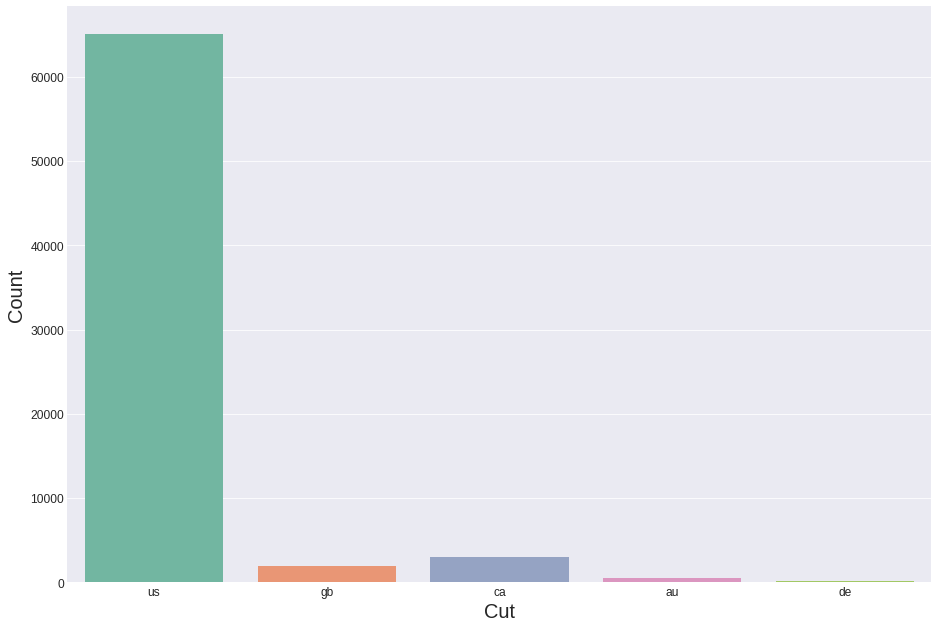

In [65]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="country", data = ufos,  palette="Set2")
plt.xlabel('Cut',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

As it is possible to observe, the reports are distributed within 5 countries, nevertheless, most of the sightings happen in the US. As a researcher, it is not worthy to move around the world looking for UFOs, when it is known that most of them happen in a given territory. That is why taking only the cases in the US was necessary. 

In [66]:
ufos_us = ufos[ufos['country']=='us']

In [67]:
ufos_us.shape

(65114, 11)

### Looking for missing values

In [68]:
ufos_us.isnull().sum()

datetime                   0
city                       0
state                      0
country                    0
shape                   1553
duration (seconds)         0
duration (hours/min)       0
comments                  13
date posted                0
latitude                   0
longitude                  0
dtype: int64

Now, there are only a few examples with missing values. Fortunately, the missing values belong only to variables that will not be used for the prediction. So they will not be treated at all. 

In [185]:
ufos_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65114 entries, 0 to 80331
Data columns (total 15 columns):
datetime                64627 non-null datetime64[ns]
day                     65114 non-null int64
hour                    65114 non-null int64
year                    65114 non-null int64
city                    65114 non-null object
state                   65114 non-null object
country                 65114 non-null object
shape                   63561 non-null object
duration (seconds)      65114 non-null float64
duration (hours/min)    65114 non-null object
comments                65101 non-null object
date posted             65114 non-null object
latitude                65114 non-null float64
longitude               65114 non-null float64
text                    64627 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 10.4+ MB


#### To numeric 
As it is possible to observe, there are some variables that should be numeric and are declared as objects, the following cell solves this issue.  

In [73]:
# This step was difficult, since the dataset was corrupted and some numerical values also included special 
# characters and casting them into int generated an exception. This task issua was solved by using regular 
# expressions in Sublime text. 

ufos_us['latitude'] = pd.to_numeric( ufos_us['latitude'])
ufos_us['duration (seconds)'] = pd.to_numeric( ufos_us['duration (seconds)'])


/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
ufos_us.isnull().sum()

datetime                   0
city                       0
state                      0
country                    0
shape                   1553
duration (seconds)         0
duration (hours/min)       0
comments                  13
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [75]:
ufos_us.describe()

duration (seconds)      latitude    longitude 
count        6.511400e+04  65114.000000  65114.000000
mean         5.800014e+03     38.357911    -95.710870
std          4.045135e+05      5.570121     18.108493
min          1.000000e-02     17.967778   -176.658056
25%          3.000000e+01     34.106389   -115.116667
50%          1.800000e+02     38.968611    -90.065556
75%          6.000000e+02     41.947500    -81.023056
max          6.627600e+07     70.636944    -65.831667

#### Convering the date and time into separate variables. 

In [95]:
ufos_us['datetime'] = pd.to_datetime(ufos_us['datetime'], errors='coerce')
ufos_us.insert(1, 'year', ufos_us['datetime'].dt.year)
ufos_us['year'] = ufos_us['year'].fillna(0).astype(int)

ValueError: hour must be in 0..23

In [136]:

ufos_us.insert(1, 'hour', ufos_us['datetime'].dt.hour)
ufos_us['hour'] = ufos_us['hour'].fillna(0).astype(int)

In [137]:
ufos_us.insert(1, 'day', ufos_us['datetime'].dt.day)
ufos_us['day'] = ufos_us['day'].fillna(0).astype(int)

# Descriptive analysis and summary statistics <a id="3"></a>

The description of the sightings will be used only for a statistic visualization. In the following word cloud, the most common words in the descriptions are illustrated.

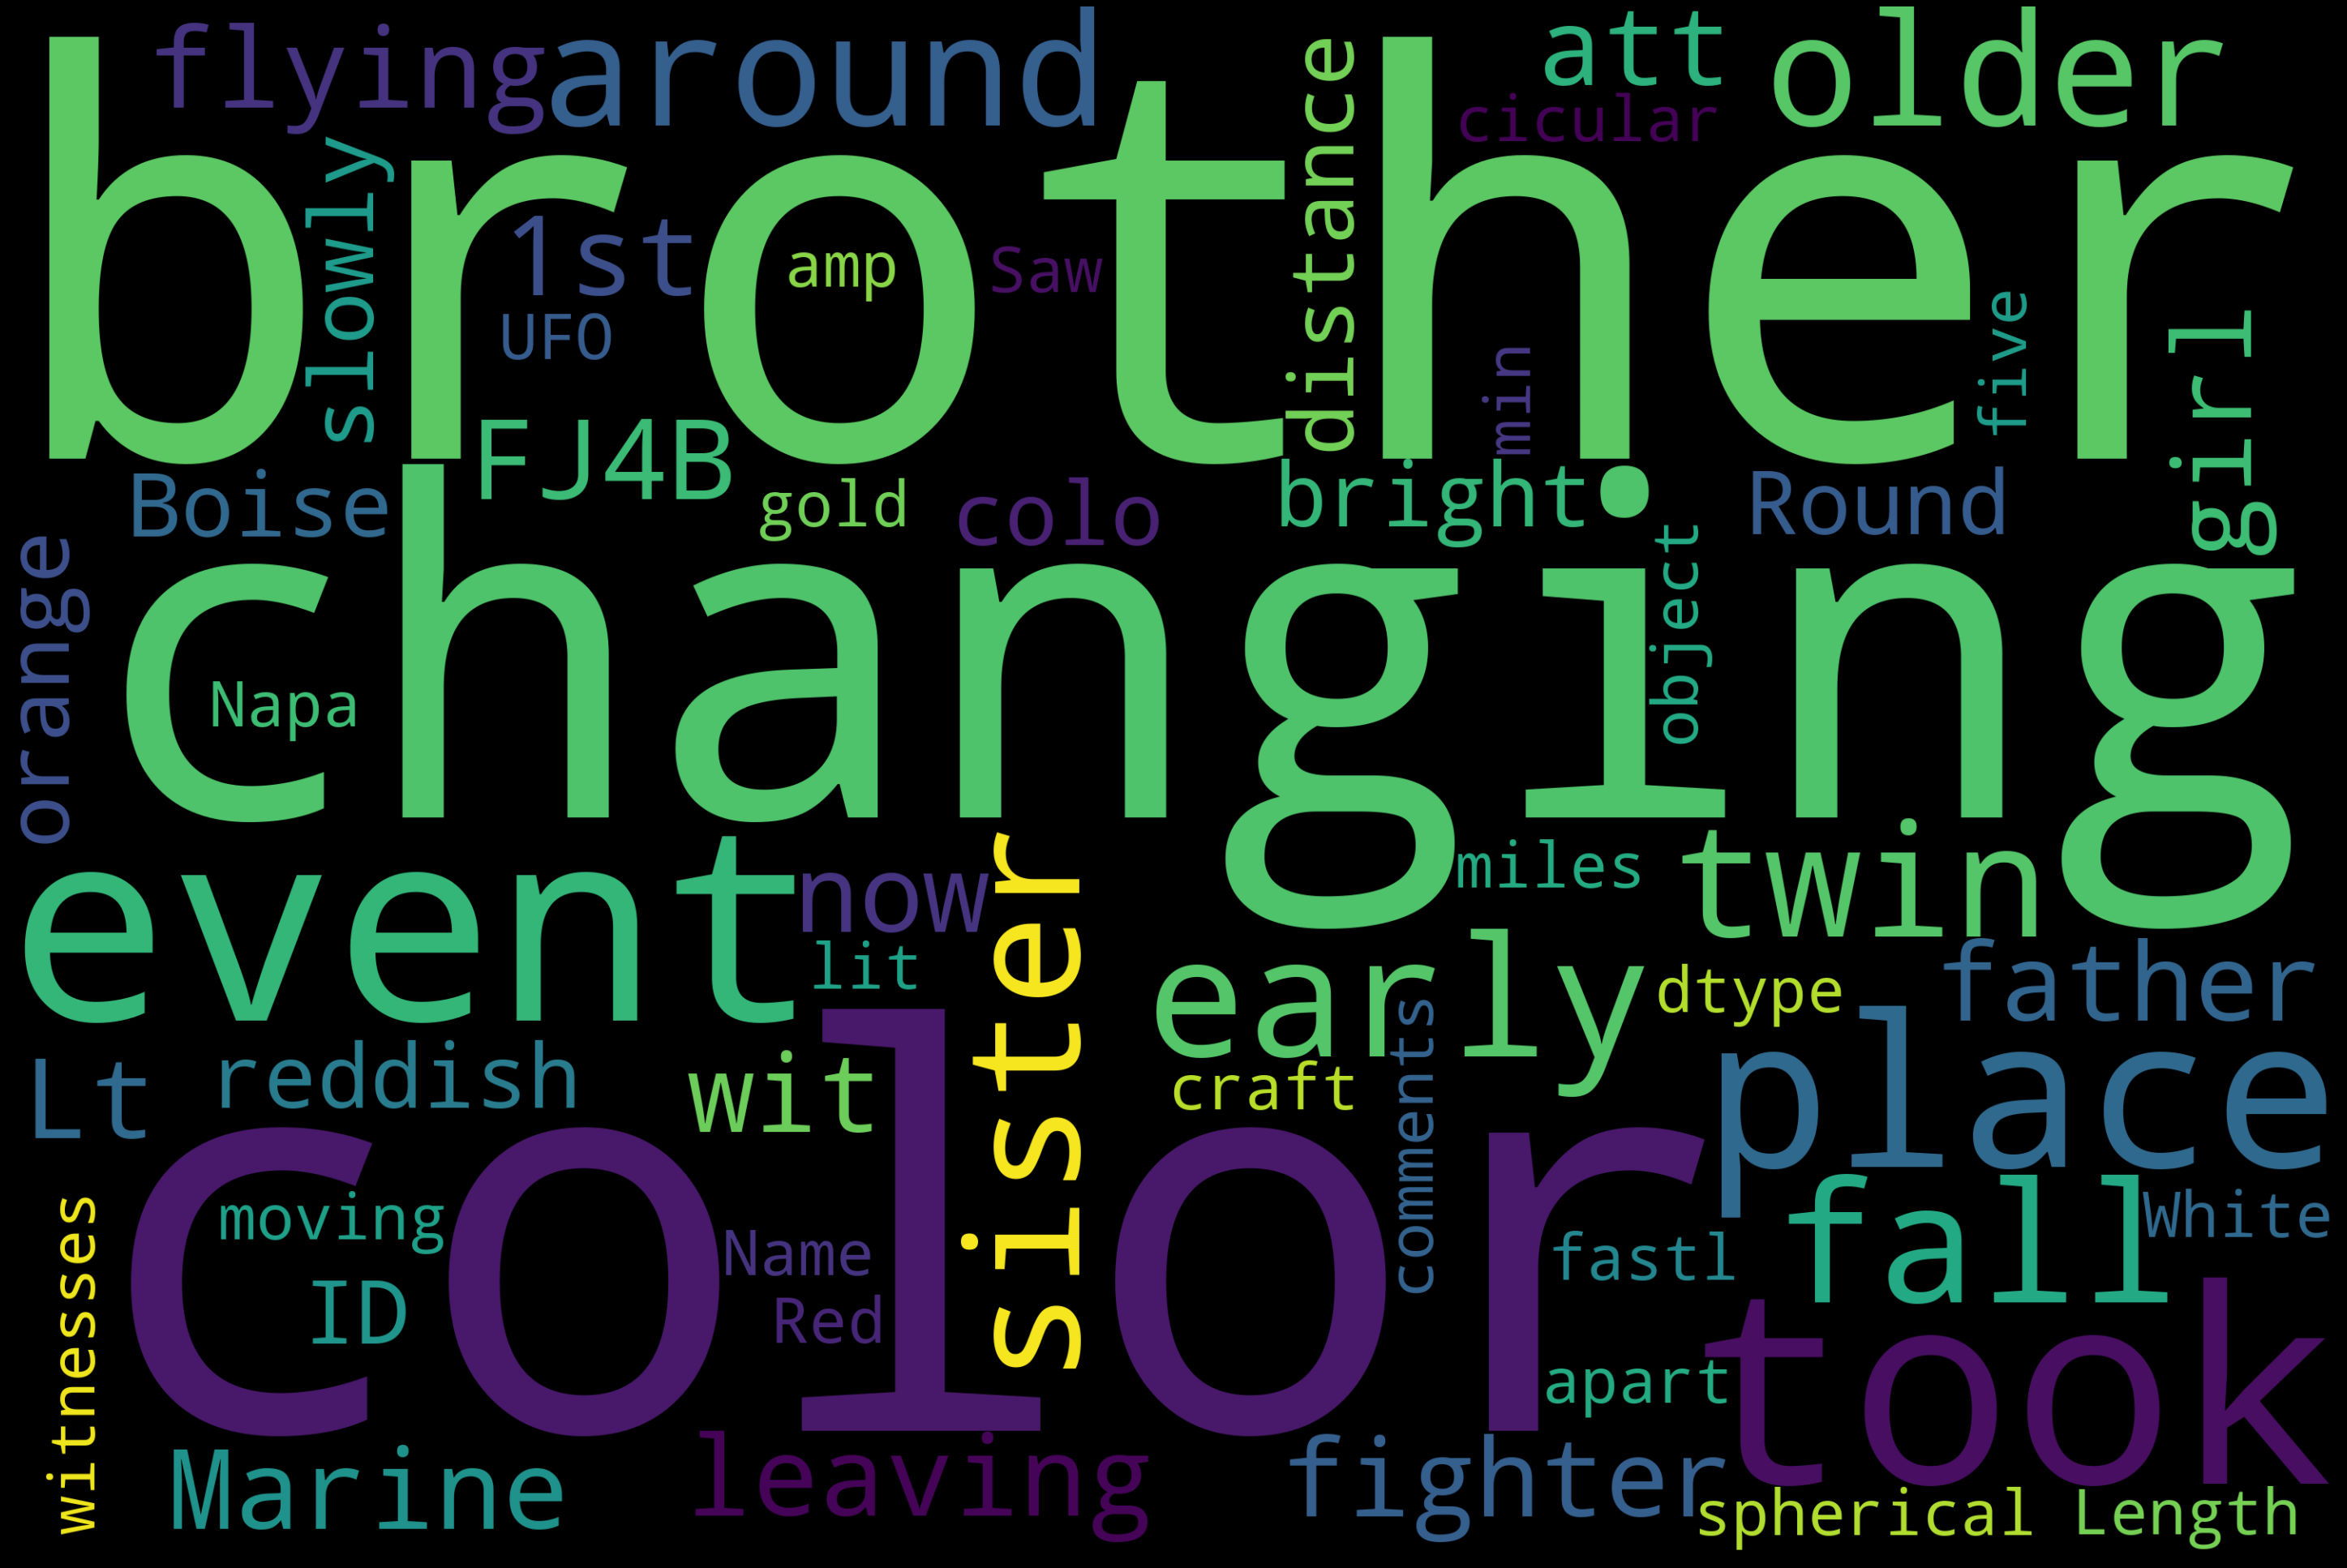

In [26]:
text = ufos_us.comments
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Visualizig the categorical variables of the dataset. 

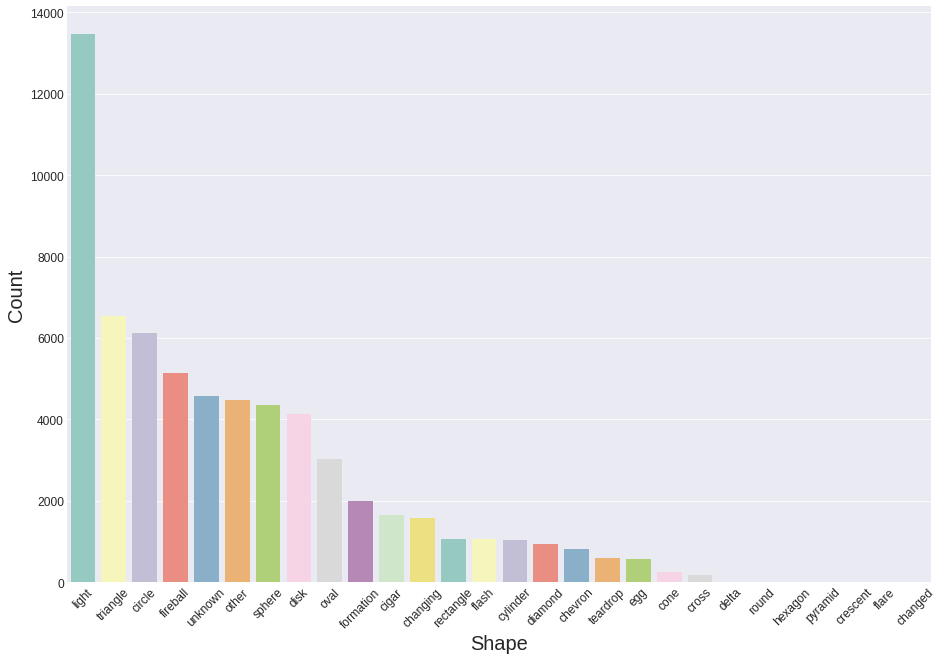

In [102]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="shape", data = ufos_us,  palette="Set3" ,order = ufos_us['shape'].value_counts().index)
plt.xlabel('Shape',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=12, rotation=45);
plt.yticks(fontsize=12);


In the following visualization, only the sightings from 1995 to 2014 are shown.

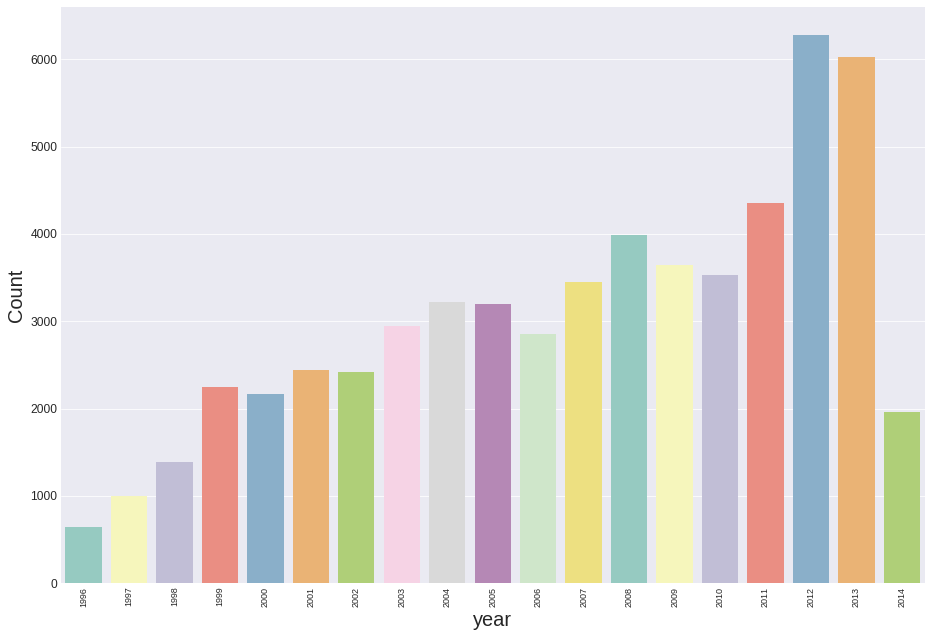

In [131]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="year", data = ufos_us[ufos_us['year']>1995],  palette="Set3")
plt.xlabel('year',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=9, rotation=90);
plt.yticks(fontsize=12);

# Hypotheses and Modeling <a id="4"></a>

We can set the hypothessis that the ufo sightings are distributed unniformly in the US and test it just by ploting the distribution of the sightings per state. 

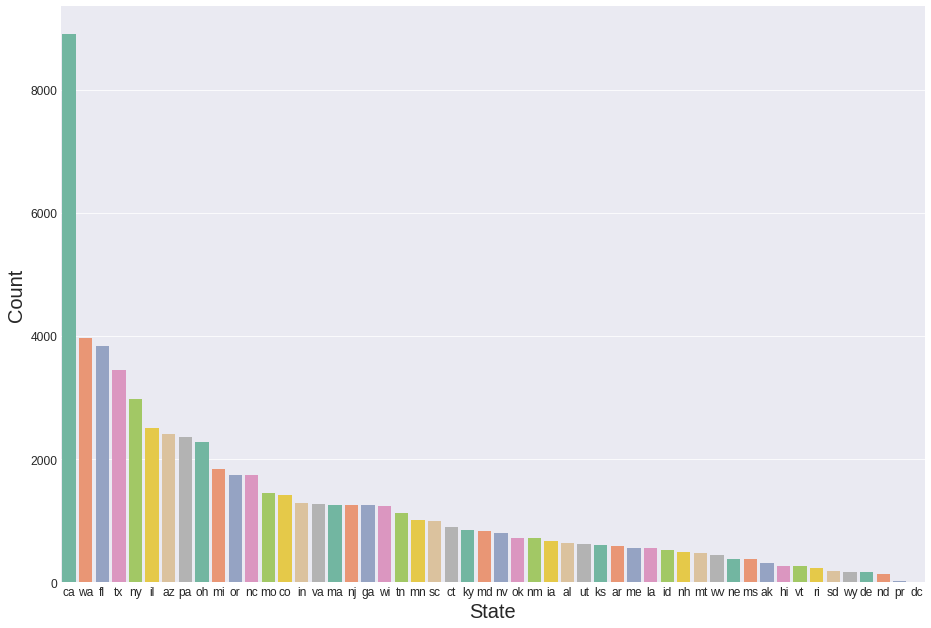

In [132]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="state", data = ufos_us,  palette="Set2" ,order = ufos_us['state'].value_counts().index)
plt.xlabel('State',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

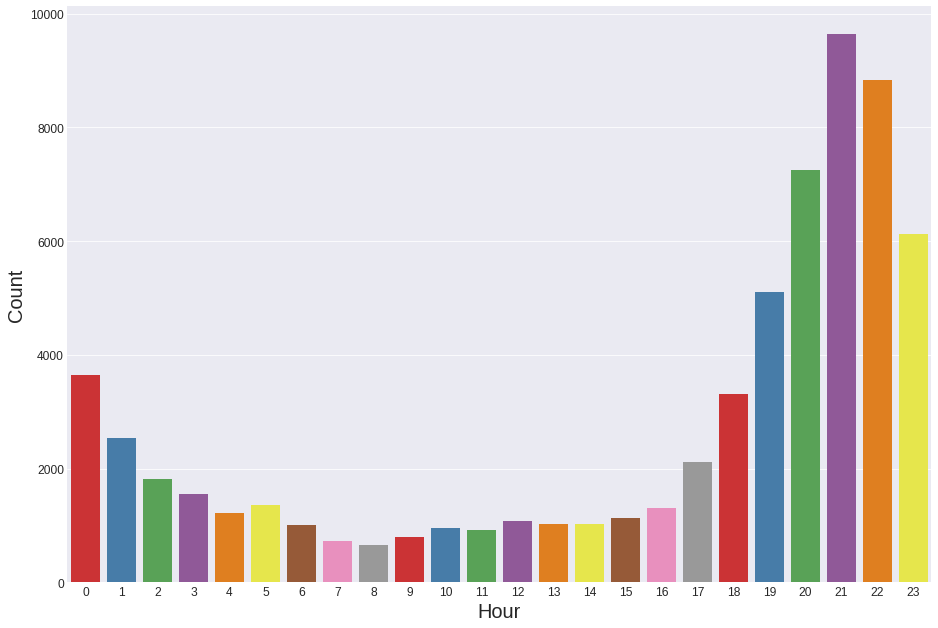

In [144]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="hour", data = ufos_us,  palette="Set1")
plt.xlabel('Hour',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

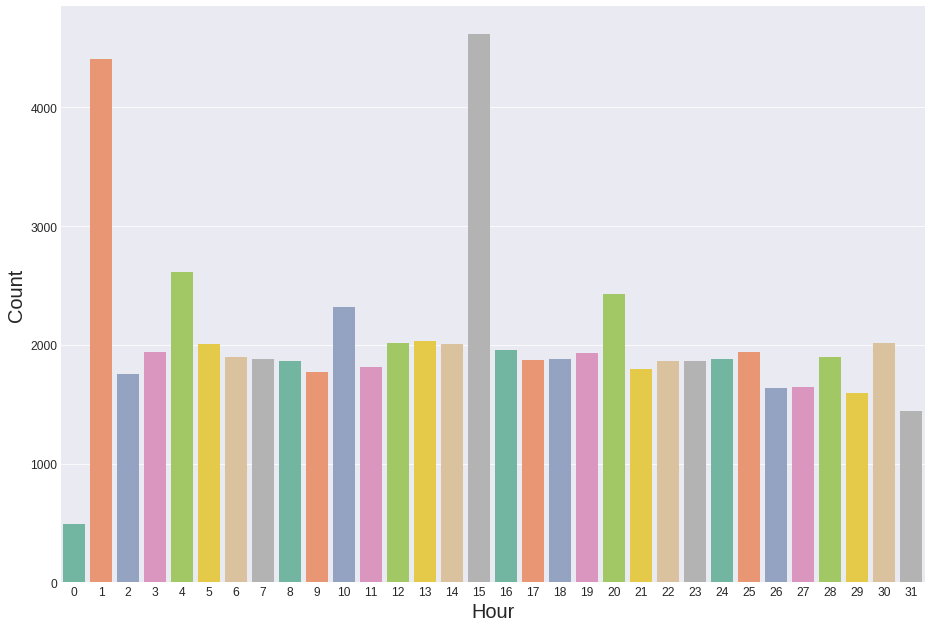

In [141]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="day", data = ufos_us,  palette="Set2" )
plt.xlabel('Hour',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

By using Tableau, some geographical plots were obtained. The following two plots depict the occurrence of UFO sightings. The first map shows a heat map where the intensity of the color indicates the density of events. The second map shows a marker for the cities with more than one event. 

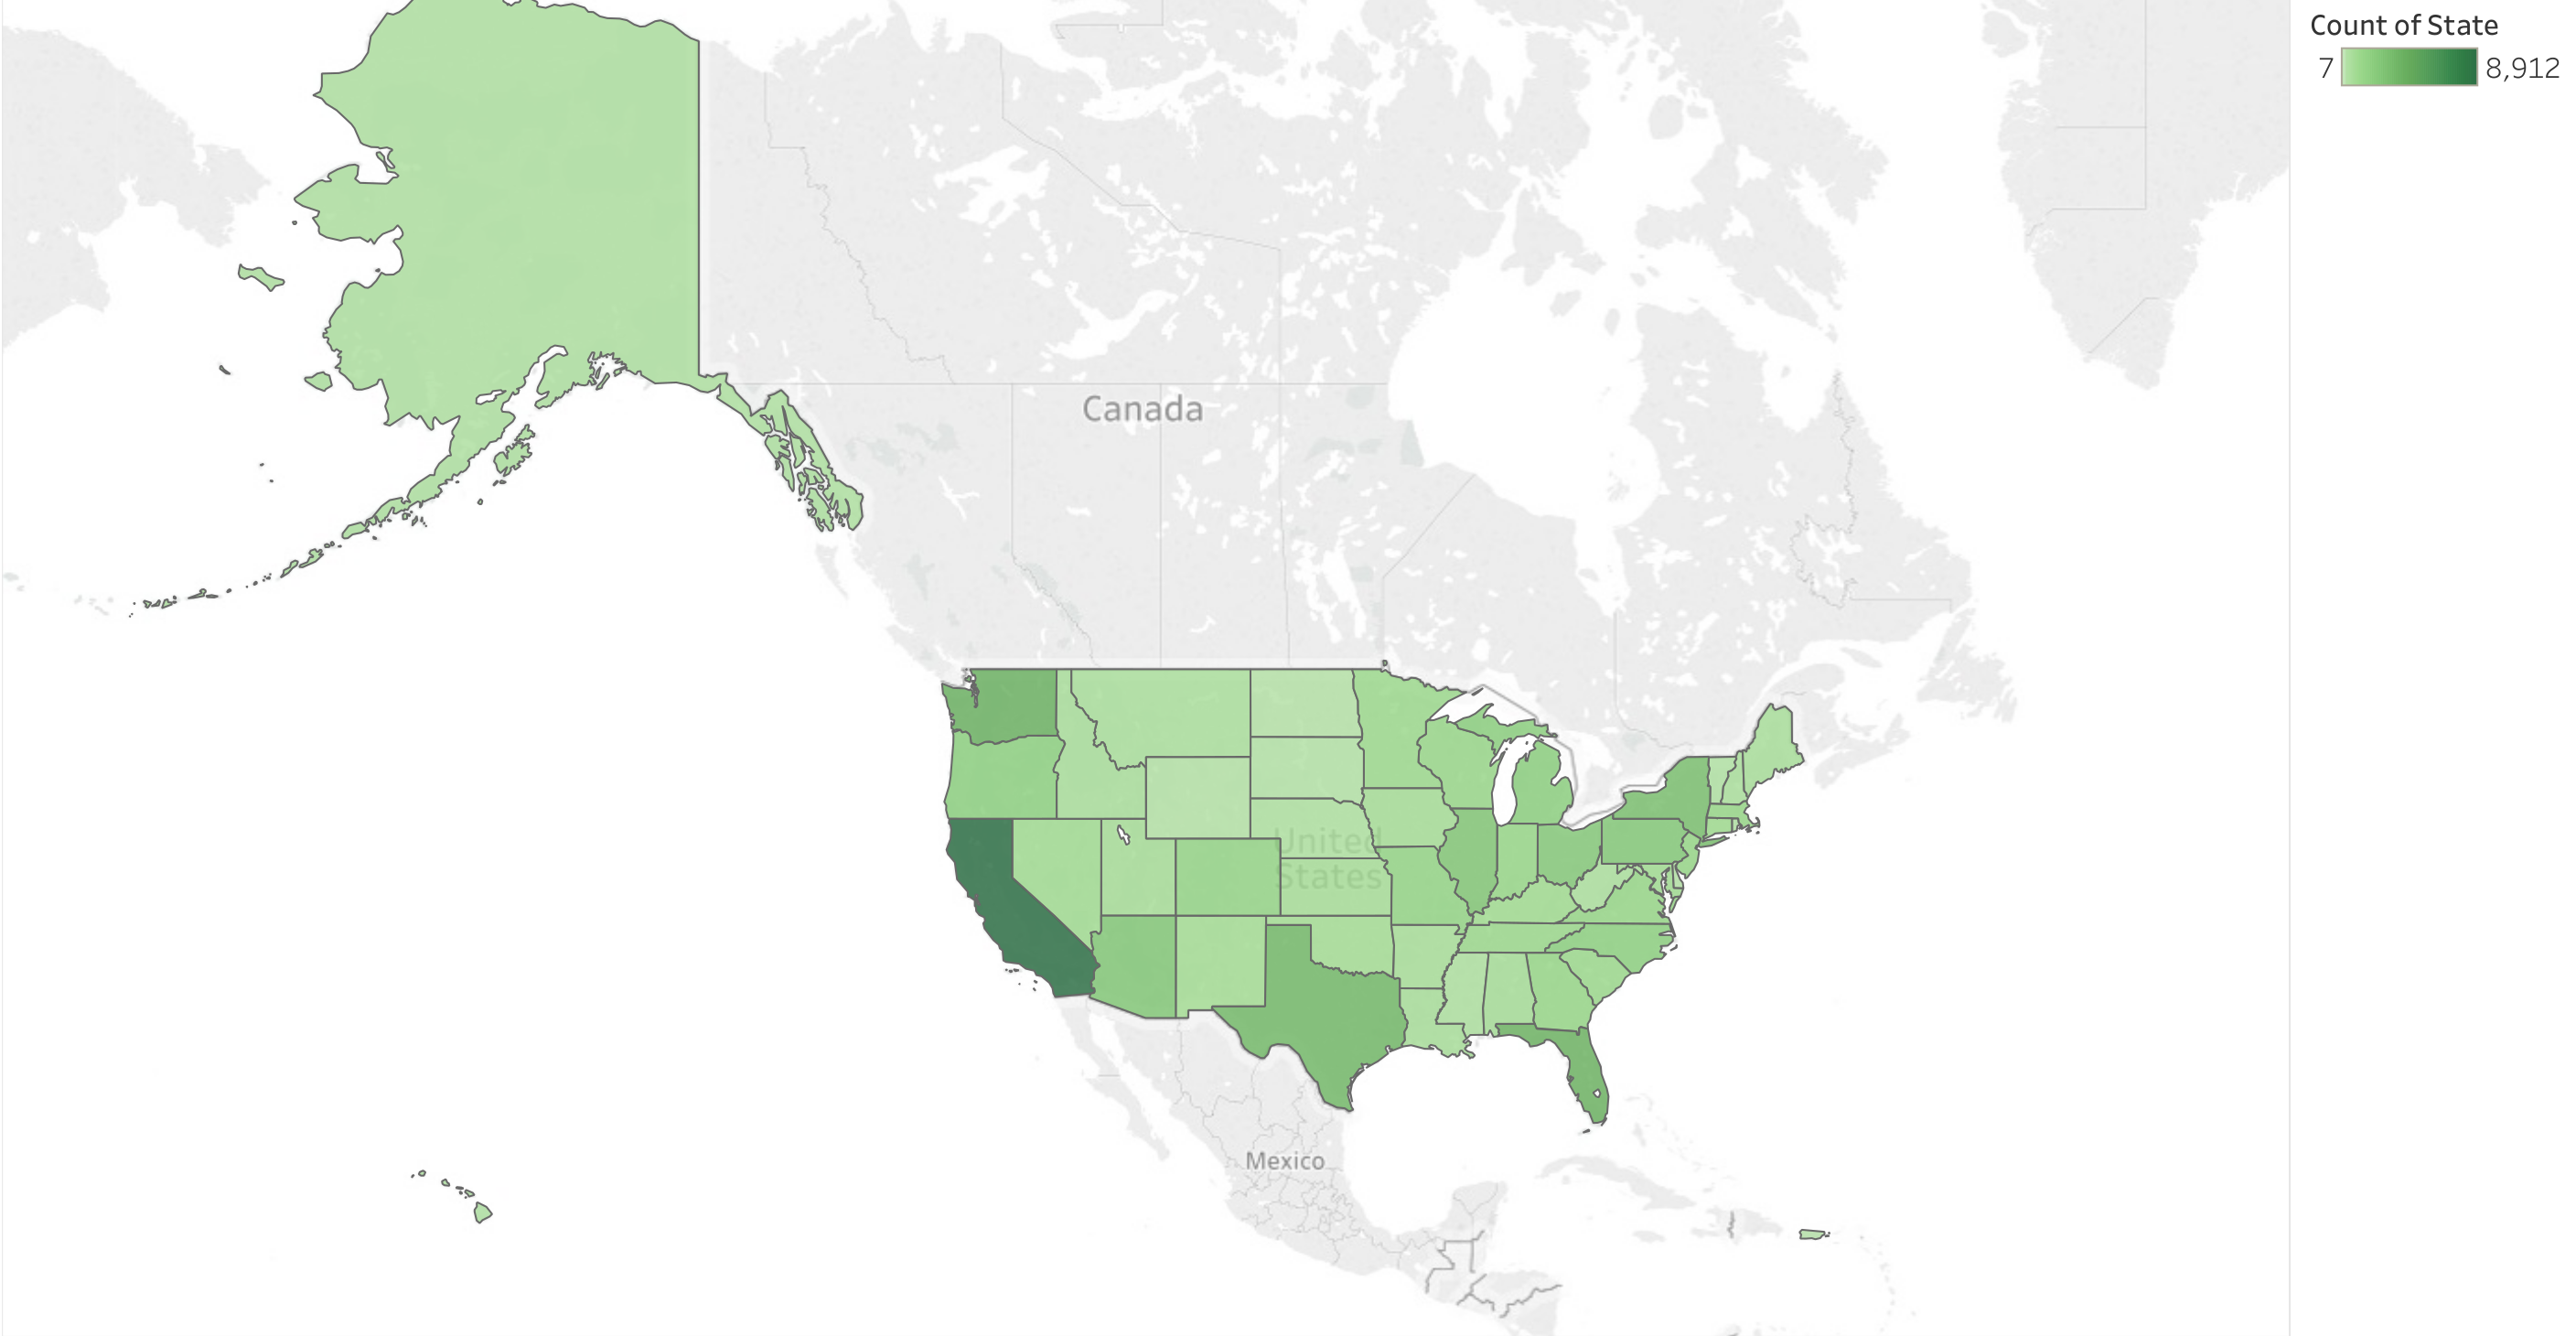

In [186]:
Image(filename='./ufo_sightings/Screenshot from 2019-10-05 17-15-11.png')

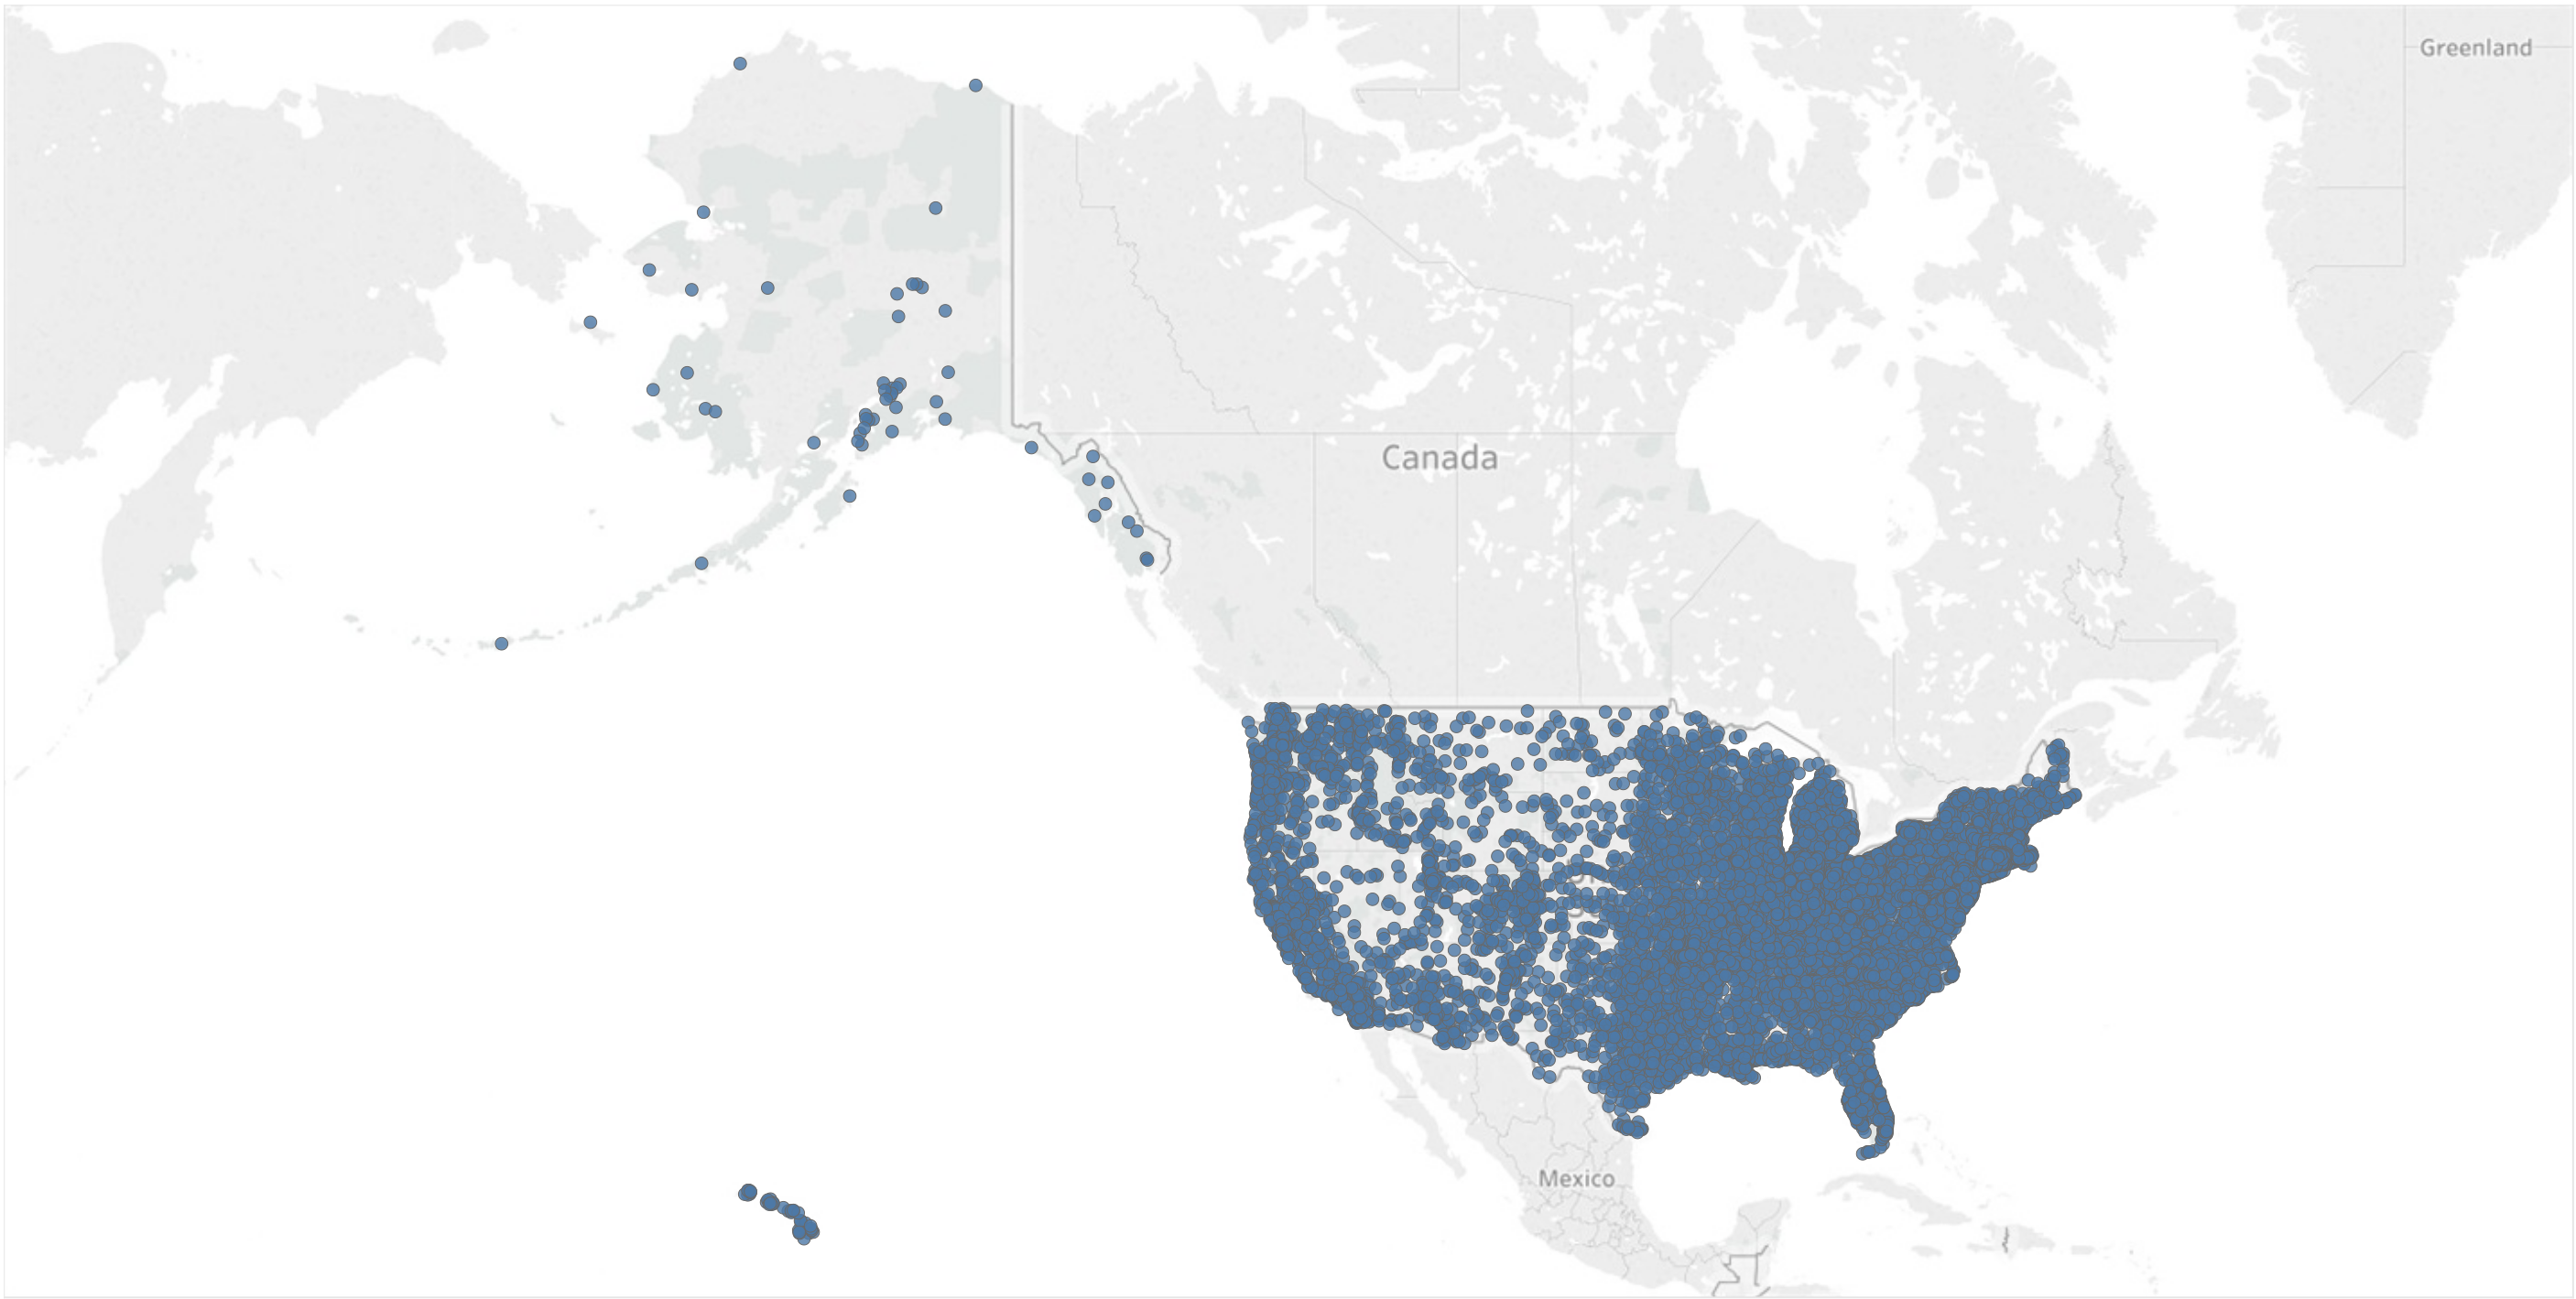

In [187]:
Image(filename='./ufo_sightings/Screenshot from 2019-10-05 17-15-38.png')

As it is possible to see, the events are not uniformly distributed and there are zones with a higher density of points. These patters can be obtained by using a clustering algorithm. As the problem states that the objective is to precise future events, by using a frequentist reasoning, zones with more density of events are prone to have more events in the future. Locating the zones and the centroids of these zones is the aim of this algorithm. In the first map, a plot of the values of latitude and longitude are displayed. In the next figure, the centroids of five clusters are illustrated with a red star. In the last figure, ten clusters are displayed in red stars. 

As the K-means algorithm uses a measure of distance, it gives an intuitively good result, since it locates the centroid in a position with high activity and likely too have an incoming event. 

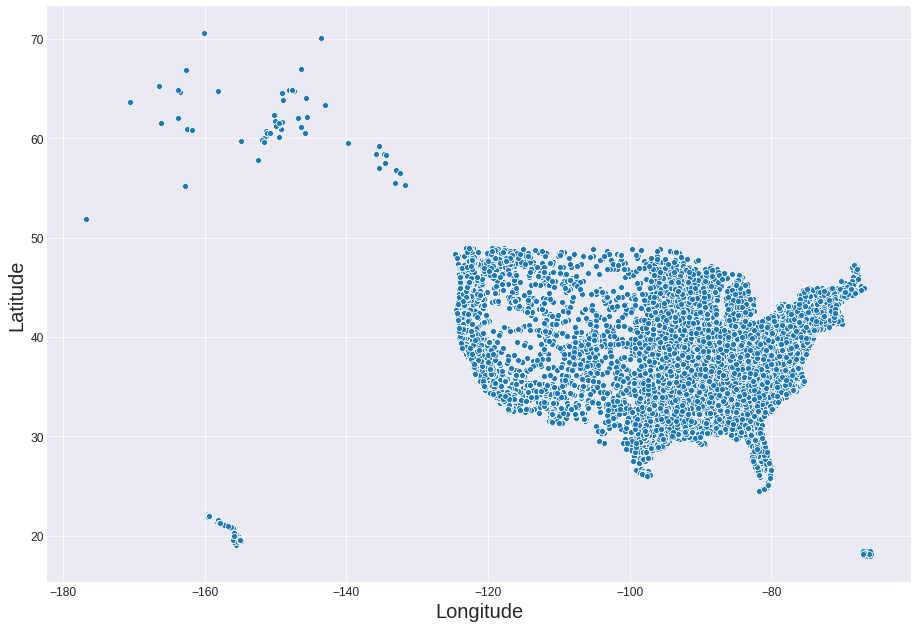

In [156]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
sns.scatterplot(ufos_us['longitude '], ufos_us['latitude'])
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [166]:
locations = ufos_us[['longitude ','latitude']]

In [191]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(locations)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [192]:
kmeans.cluster_centers_[:,1]

array([46.97994291, 40.94743624, 36.86443201, 35.34344434, 36.5136328 ])

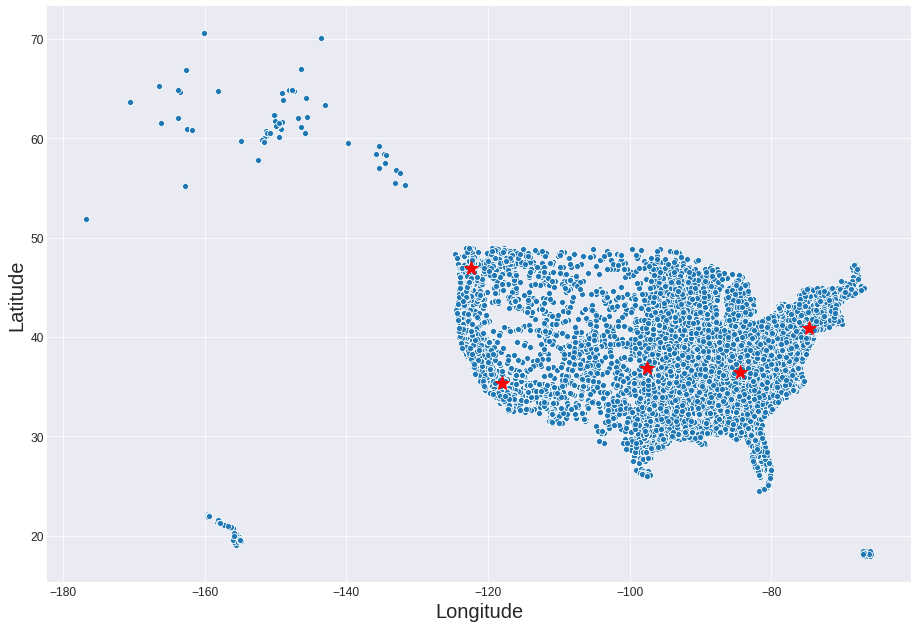

In [194]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
sns.scatterplot(ufos_us['longitude '], ufos_us['latitude'])
# plt.plot(x= kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0] , '*r')
for centroid in kmeans.cluster_centers_:
    plt.plot(centroid[0],centroid[1], '*r',markersize = 14)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [183]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(locations)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

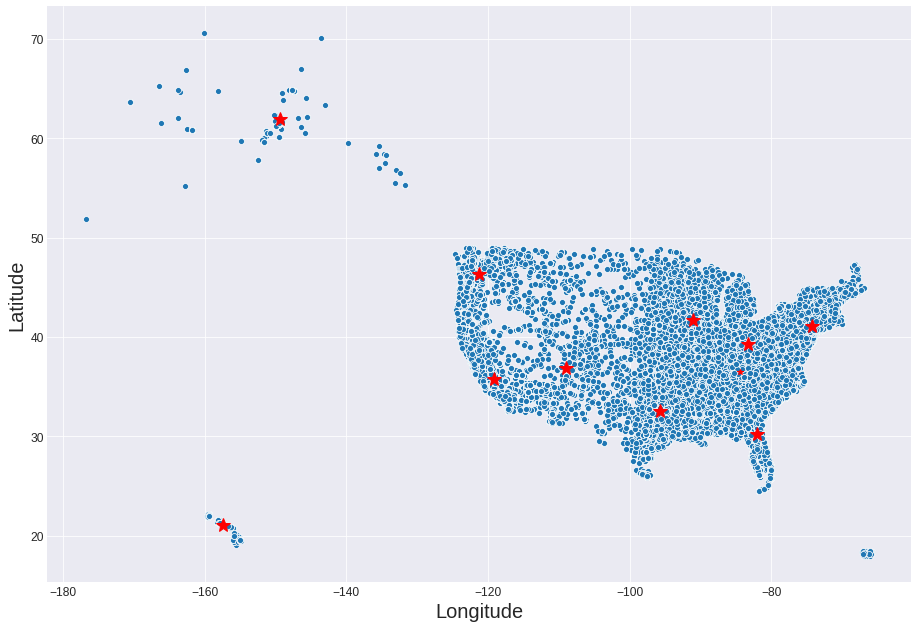

In [184]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
sns.scatterplot(ufos_us['longitude '], ufos_us['latitude'])
# plt.plot(x= kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0] , '*r')
plt.plot(-84.49178436 ,  36.51926971, '*r')
for centroid in kmeans.cluster_centers_:
    plt.plot(centroid[0],centroid[1], '*r',markersize = 14)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# Conclussions and next steps <a id="5"></a>

It is possible to conclude that there are hours and locations with more chance of having a UFO sighting. Also, it can be said that the shape does follow a pattern and there are shapes that are more common to observe in the skies. Among the month, the frequency of sightings seems to be uniform despite the fact that days first and fifteenth of the month are prone to show activity. 

For the next step, it would be helpful to include extra data to the analysis. Including the population of the cities could be helpful since it could be possible to hypothesize that the UFOs appear uniformly at random, but the number of people that watch them does not and it is more likely to sight one in a more populated location. Including data referring to the air quality might also be helpful since locations and days with better air quality might be better for UFO sightings. These suggestions require a more detailed analysis and more data from different sources.